FEATURE EXTRACTION EXAMPLE

This notebook contains an example of how to extract Mel-frequency cepstral coefficient (MFCC) features from the sound data in the dataset.
This example uses parameters similar to those define in the paper: Salamon J, Jacoby C, Bello JP. A dataset and taxonomy for urban sound research. In Proceedings of the 22nd ACM international conference on Multimedia 2014 Nov 3 (pp. 1041-1044).

This example peforms the following steps:
- Resample the sound recording to a target sampling rate of 44,100 kHz
- Zero-pad the sound recording to a duration of 4 seconds
- Compute the MFCCs

The following example is highly NOT optimized and it may serve just as a starting point for your solution.
You are strongly encouraged to consider different paramters and approaches to pre-process the data.

In [37]:
import matplotlib.pyplot as plt
import librosa
import numpy as np

Finds all .wav flies in fold1

In [43]:
_wav_dir_="./UrbanSound8K/audio/fold1/"
files = librosa.util.find_files(_wav_dir_)

Parameters

In [39]:
# resampling freq
target_sr =44100

# MFCC parameters
n_mfcc=40
hop_length=round(target_sr*0.0125)
win_length=round(target_sr*0.023)
n_fft=2**14
mfcc_time_size = 4*target_sr//hop_length+1

# read all wav file without resampling
dataset=np.zeros(shape=[len(files),4*target_sr])
dataset_mfcc=np.zeros(shape=[len(files),n_mfcc,mfcc_time_size])

Main loop. It might last few minutes

In [40]:
i=0
for f in files:
    (sig, rate) = librosa.load(f, sr=None)
    sig_res =librosa.resample(sig, orig_sr=rate, target_sr=target_sr)
    # zero padding
    if len(sig_res)<4*target_sr:
        sig_res_pad = np.concatenate((sig_res, np.zeros(4*target_sr-len(sig_res))),axis=0)
    else:
        sig_res_pad=sig_res
    dataset[i]=sig_res_pad
    # computes the MFCCs
    sig_mfcc =librosa.feature.mfcc(y=sig_res_pad,sr=target_sr,n_fft=n_fft,hop_length=hop_length,win_length=win_length,n_mfcc=n_mfcc)
    dataset_mfcc[i]=sig_mfcc
    i+=1

Visualization of an example

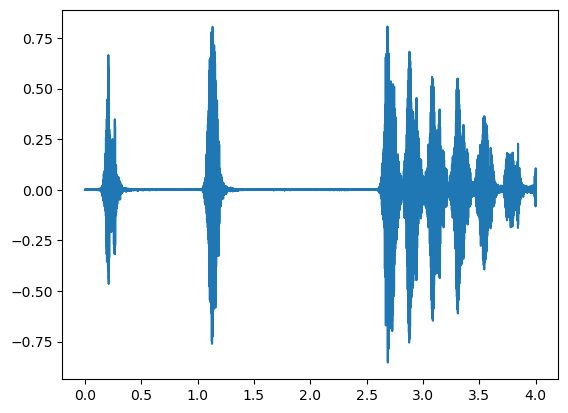

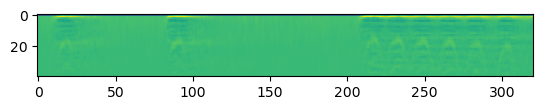

In [41]:
index=0
plt.figure()
plt.plot(np.asarray(list(range(4*target_sr)))/target_sr,dataset[index])
plt.show()

plt.figure()
plt.imshow(dataset_mfcc[index])
plt.show()


Save the data

In [46]:
import pandas as pd

In [50]:
df = pd.DataFrame(dataset) 
df

,0,1,2,3,4,5,6,7,8,9,...,176390,176391,176392,176393,176394,176395,176396,176397,176398,176399
0,-0.000138,-0.000159,-0.000178,-0.000153,-0.000197,-0.000158,-0.000175,-0.000149,-0.000112,-0.000169,...,-0.042048,-0.042229,-0.045922,-0.044871,-0.045688,-0.045193,-0.048626,-0.047567,-0.048357,-0.047309
1,-0.000750,-0.000942,-0.000932,-0.000989,-0.000869,-0.000871,-0.000930,-0.001065,-0.000926,-0.000803,...,-0.000181,-0.000230,-0.000270,-0.000251,-0.000259,-0.000207,-0.000283,-0.000263,-0.000305,-0.000356
2,0.302207,0.340815,0.315753,0.328800,0.305526,0.306111,0.273706,0.261648,0.222450,0.203661,...,-0.004541,-0.005201,-0.005283,-0.004372,-0.002880,-0.001531,-0.001331,-0.001294,-0.001028,-0.000884
3,0.009323,0.006592,0.000748,-0.001053,-0.000168,-0.002625,-0.006973,-0.009216,-0.007614,-0.002579,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000015,0.000183,0.000488,0.000824,0.001022,0.001221,0.001450,0.001373,0.000916,0.000153,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,-0.084899,-0.101284,-0.111210,-0.115569,-0.116642,-0.116961,-0.118237,-0.120749,-0.123390,-0.124213,...,0.011296,0.008543,0.005961,0.003747,0.001998,0.000728,-0.000105,-0.000575,-0.000762,-0.000743
869,-0.034248,-0.031561,-0.018411,0.005855,0.039848,0.080349,0.122893,0.162550,0.194753,0.216036,...,-0.069445,-0.083100,-0.096903,-0.108044,-0.113690,-0.111676,-0.101103,-0.082661,-0.058602,-0.032328
870,-0.028990,-0.053813,-0.084240,-0.116464,-0.145772,-0.167609,-0.178504,-0.176624,-0.161842,-0.135443,...,-0.000522,0.018899,0.038841,0.055652,0.066336,0.069147,0.063883,0.051863,0.035568,0.018075
871,-0.091219,-0.072146,-0.026716,0.039760,0.117230,0.193960,0.259702,0.307906,0.336429,0.346890,...,-0.060939,-0.078451,-0.091168,-0.097266,-0.095814,-0.087009,-0.072179,-0.053540,-0.033778,-0.015553


In [49]:
dataset_mfcc

array([[[-4.63114807e+02, -4.59116516e+02, -4.57935608e+02, ...,
         -3.73826172e+02, -3.48723175e+02, -2.22139511e+02],
        [ 6.40553665e+00,  1.19068766e+01,  1.36498241e+01, ...,
          1.13063080e+02,  1.37978104e+02,  1.48628723e+02],
        [ 6.24039459e+00,  1.12966080e+01,  1.32494965e+01, ...,
          6.80363007e+01,  7.35527725e+01,  3.10699158e+01],
        ...,
        [ 1.69163609e+00, -1.88172770e+00, -1.18501663e+00, ...,
         -1.35005264e+01,  6.93819284e-01, -8.34111452e-01],
        [ 1.85451460e+00, -1.54264998e+00, -1.28383946e+00, ...,
         -1.17721148e+01,  8.82756472e-01, -1.76683319e+00],
        [ 1.98301351e+00, -1.20623887e+00, -1.36647534e+00, ...,
         -4.00552464e+00,  2.95867443e+00,  3.04723692e+00]],

       [[-4.52009247e+02, -4.55008057e+02, -4.52380371e+02, ...,
         -4.53190796e+02, -4.48462921e+02, -4.48517029e+02],
        [ 1.86001987e+01,  1.41102476e+01,  1.73808556e+01, ...,
          1.70611343e+01,  2.32617474e

In [48]:
df_mfcc = pd.DataFrame(dataset_mfcc)
df_mfcc

ValueError: Must pass 2-d input. shape=(873, 40, 321)